# Exploratory Data Analysis - Insurance Charge Case

* Penulis : Prasetyo Widyantoro
* Username : prasetyo-c8lR

# Import Library

Import library yang diperlukan untuk proses analisa data mulai dari pandas, numpy, matplotlib, sklearn, scipy dan statistics adapun library tersebut secara umum berfungsi sebagai analisa dataframe, visualisasi data, analisa regresi, dan eksplorasi berdasarkan perhitungan statistik

In [1]:
import pandas as pd                                   # import pandas untuk olah dataframe
import numpy as np                                    # import numpy untuk olah data secara matematik
import matplotlib.pyplot as plt                       # import matplotlib untuk melakukan visualisasi data
from matplotlib.cbook import boxplot_stats            # import matplotlib untuk melakukan visualisasi data khusus boxplot
import seaborn as sns                                 # import seaborn untuk visualisasi data agar lebih cepat dan interaktif
from sklearn.linear_model import LinearRegression     # import sklearn untuk linear regression
from scipy.stats import ttest_ind                     # import scipy stats untuk uji statistik
from scipy.stats import t                             # import scipy stats untuk uji statistik
import statistics
from statistics import mean
from scipy import stats
import warnings

# Import Data Asuransi

Dataset yang disediakan adalah data tagihan kesehatan personal. Data ini memiliki 7 variable
dengan variable charges menunjukkan besaran tagihan kesehatan. Deskripsi setiap kolom dari
dataset adalah sebagai berikut:

- age, Age of primary beneficiary
- sex, Insurance contractor gender, female, male
- bmi, Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m2) using the ratio of height to weight, ideally 18.5 to 24.9
- children, Number of children covered by health insurance / Number of dependents
- smoker, Smoking
- region, The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges, Individual medical costs billed by health insurance

In [3]:
#Import data asuransi menggunakan pandas
data_asuransi = pd.read_csv("insurance.csv")
#Melihat 10 Data teratas
data_asuransi.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Melihat Persentase Nilai Null pada Data Asuransi

Secara umum, jika nilai null terkandung pada data asuransi maka akan dihapus, jika tidak maka akan langsung dilanjutkan pada proses berikutnya.

In [4]:
# Mengecek persentase data bernilai null
data_null = (data_asuransi.isnull().sum()/data_asuransi.isnull().count())*100
# Melihat data persentase nilai null
data_null

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Data menunjukkan tidak ada variabel yang bernilai null, maka proses analisa akan dilanjutkan

## Melihat Informasi Dataframe pada Data Asuransi

Hal ini dilakukan untuk mengetahui informasi yang terkandung pada data mulai dari tipe data, total baris dan kolom, hingga memory yang digunakan

In [5]:
# Melihat informasi yang terkandung pada data
data_asuransi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Melihat Statistika Deskriptif pada Data Asuransi

Hal ini dilakukan untuk melihat secara general mengenai statistika deskriptif

In [6]:
# Melihat informasi statistika deskriptif
data_asuransi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Melihat Unique Value

Melihat unique value pada kolom sex, smoker, region, dan children

In [7]:
# Melihat unique value pada kolom sex, smoker, region, dan children
print("nilai unik pada kolom sex adalah", data_asuransi["sex"].unique())
print("nilai unik pada kolom smoker adalah", data_asuransi["smoker"].unique())
print("nilai unik pada kolom region adalah", data_asuransi["region"].unique())
print("nilai unik pada kolom region adalah", data_asuransi["children"].unique())

nilai unik pada kolom sex adalah ['female' 'male']
nilai unik pada kolom smoker adalah ['yes' 'no']
nilai unik pada kolom region adalah ['southwest' 'southeast' 'northwest' 'northeast']
nilai unik pada kolom region adalah [0 1 3 2 5 4]


## Hasil Eksplorasi awal menunjukkan :

- Record data berjumlah 1338 baris dan 7 kolom
- Data tidak menunjukkan adanya nilai null
- kolom age, children bertipe data integer
- kolom sex, smoker dan region bertipe data object
- kolom bmi dan charges bertipe data float
- Nilai unik pada kolom sex antara lain female dan male
- Nilai unik pada kolom smoker antara lain yes dan no
- Nilai unik pada kolom region antara lain southwest, southeast, northwest, northeast

## Langkah Analisa : #1 Analisa Descriptive Statistic

## A. Rata-rata Umur Pengguna

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\3226938827.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('1_Rata_rata_usia.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\3226938827.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('1_Rata_rata_usia.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData

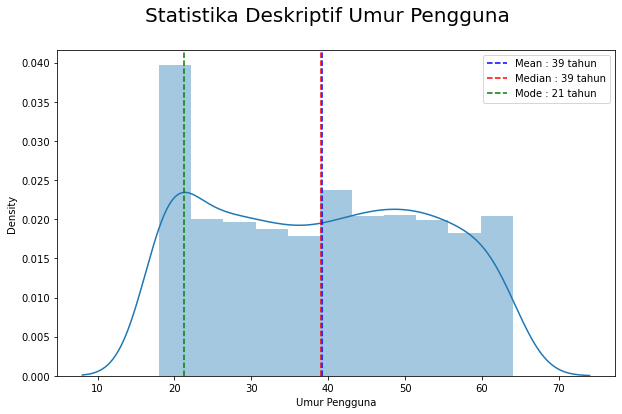

Rata - rata usia pengguna ialah : 39 tahun


In [8]:
#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('Statistika Deskriptif Umur Pengguna', fontsize=20)
p = sns.distplot(data_asuransi["age"], axlabel="Umur Pengguna")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(data_asuransi["age"]), color="b", linestyle="--", label=f"Mean : {data_asuransi['age'].mean():.0f} tahun")
line2 = plt.axvline(np.median(data_asuransi["age"]), color="r", linestyle="--", label=f"Median : {data_asuransi['age'].median():.0f} tahun")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.0f} tahun")

first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
plt.savefig('1_Rata_rata_usia.jpg', dpi=300, quality=80, optimize=True, progressive=True)  
#Show visualisasi
plt.show()
print(f"Rata - rata usia pengguna ialah : {data_asuransi.age.mean():.0f} tahun")


## B.  Rata-rata nilai BMI dari pengguna yang merokok

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\2967774105.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('1_Rata_rata_BMI_Perokok.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\2967774105.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('1_Rata_rata_BMI_Perokok.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users

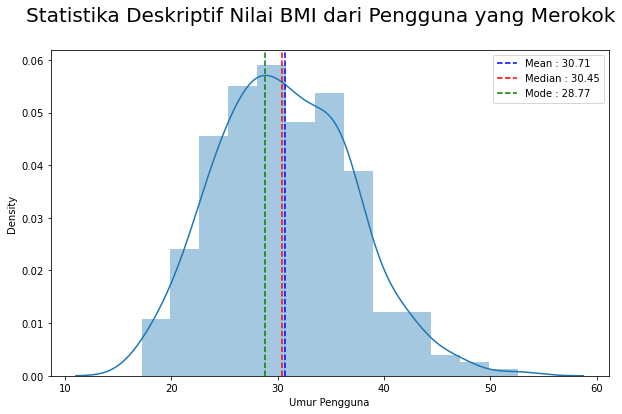

Rata-rata nilai BMI dari pengguna yang merokok : 30.71


In [9]:
#Prepare Data pengguna yang merokok
pengguna_perokok = data_asuransi[data_asuransi["smoker"] == "yes"]['bmi']

#Melakukan Visualisasi data dengan menggunakan displot
plt.figure(figsize=(10,6))
plt.suptitle('Statistika Deskriptif Nilai BMI dari Pengguna yang Merokok', fontsize=20)
p = sns.distplot(pengguna_perokok, axlabel="Umur Pengguna")

#Kalkulasi central tendency pada data
line1 = plt.axvline(np.mean(pengguna_perokok), color="b", linestyle="--", label=f"Mean : {pengguna_perokok.mean():.2f}")
line2 = plt.axvline(np.median(pengguna_perokok), color="r", linestyle="--", label=f"Median : {pengguna_perokok.median():.2f}")
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)
line3 = plt.axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.2f}")
first_legend = plt.legend(handles=[line1, line2, line3], loc=1)
plt.savefig('1_Rata_rata_BMI_Perokok.jpg', dpi=300, quality=80, optimize=True, progressive=True)
#Show visualisasi
plt.show()
print(f"Rata-rata nilai BMI dari pengguna yang merokok : {pengguna_perokok.mean():.2f}")

## C. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\2338114984.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('1_Rata_rata_gender_perokok.jpg', dpi=300, quality=80, op

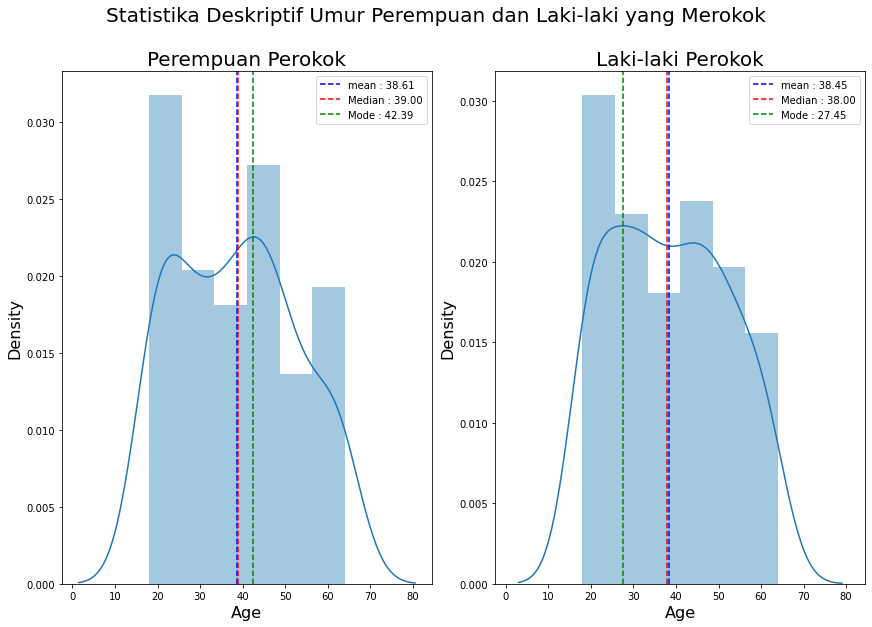

Rata-rata Umur Perempuan yang merokok adalah : 38.61
Rata-rata Umur Laki-laki yang merokok adalah : 38.45


In [12]:
#Prepare Data perempuan dan laki-laki yang merokok
perempuan_rokok = data_asuransi[(data_asuransi["sex"]=="female") & (data_asuransi["smoker"]=="yes")]['age']
laki_rokok = data_asuransi[(data_asuransi["sex"]=="male") & (data_asuransi["smoker"]=="yes")]['age']
perempuan_rokok_mean = perempuan_rokok.mean()
laki_rokok_mean = laki_rokok.mean()

#Melakukan Visualisasi data dengan menggunakan displot dan kalkulasi central tendency
fig, ax = plt.subplots(1,2,figsize=(12,8), constrained_layout=True, sharex=True)
p = sns.distplot(perempuan_rokok, ax=ax[0], kde=True)
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)

ax[0].set_title("Perempuan Perokok", fontsize=20)
ax[0].axvline(x=perempuan_rokok_mean, color="b", linestyle="--", label=f"mean : {perempuan_rokok_mean:.2f}")
ax[0].axvline(np.median(perempuan_rokok), color="r", linestyle="--", label=f"Median : {perempuan_rokok.median():.2f}")
ax[0].axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.2f}")
ax[0].set_xlabel("Age", fontsize=16)
ax[0].set_ylabel("Density", fontsize=16)
ax[0].legend()

q = sns.distplot(laki_rokok, ax=ax[1], kde=True)
foo3,foo4 = q.get_lines()[0].get_data()
idx = np.argmax(foo4)

ax[1].set_title("Laki-laki Perokok", fontsize=20)
ax[1].axvline(x=laki_rokok_mean, color="b", linestyle="--", label=f"mean : {laki_rokok_mean:.2f}")
ax[1].axvline(np.median(laki_rokok), color="r", linestyle="--", label=f"Median : {laki_rokok.median():.2f}")
ax[1].axvline(foo3[idx], color="g", linestyle="--", label = f"Mode : {foo3[idx]:.2f}")
ax[1].set_xlabel("Age", fontsize=16)
ax[1].set_ylabel("Density", fontsize=16)
ax[1].legend()

plt.suptitle('Statistika Deskriptif Umur Perempuan dan Laki-laki yang Merokok', fontsize=20, y=1.07)
#Show Visualisasi
plt.savefig('1_Rata_rata_gender_perokok.jpg', dpi=300, quality=80, optimize=True, progressive=True)
plt.show()

print(f"Rata-rata Umur Perempuan yang merokok adalah : {perempuan_rokok.mean():.2f}")
print(f"Rata-rata Umur Laki-laki yang merokok adalah : {laki_rokok.mean():.2f}")

## D. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non perokok?

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\1295762721.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('1_Rata_rata_tagihan_perokok_nonperokok.jpg', dpi=300, qu

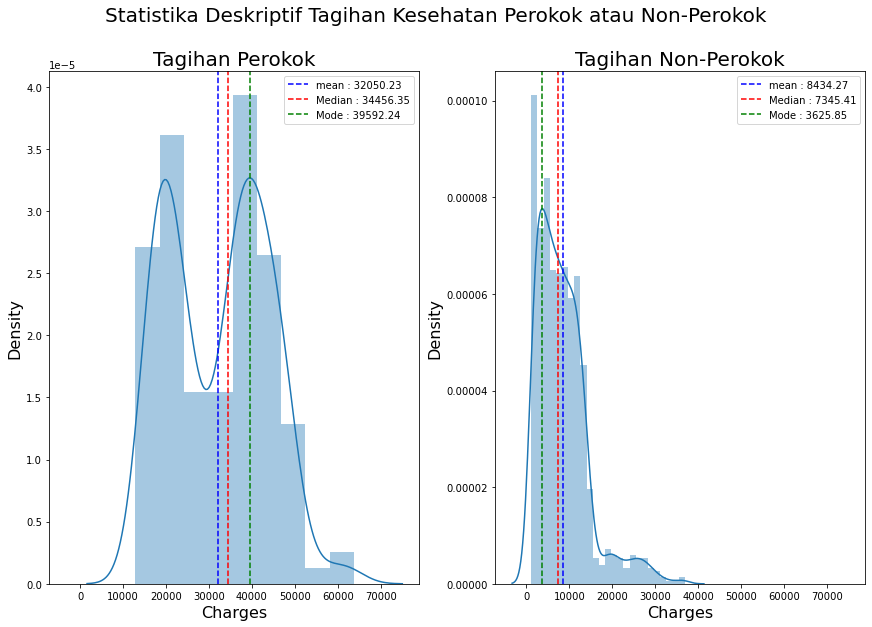

Rata-rata tagihan dari pengguna yang merokok : 32050.23
Rata-rata tagihan dari pengguna yang non-merokok : 8434.27


In [13]:
#Prepare Data tagihan kesehatan perokok dan non perokok
tagihan_perokok = data_asuransi[data_asuransi["smoker"] == "yes"]['charges']
tagihan_non_perokok = data_asuransi[data_asuransi["smoker"] == "no"]['charges']
tagihan_perokok_mean = tagihan_perokok.mean()
tagihan_non_perokok_mean = tagihan_non_perokok.mean()

#Melakukan Visualisasi data dengan menggunakan displot dan kalkulasi central tendency
fig, ax = plt.subplots(1,2,figsize=(12,8), constrained_layout=True, sharex=True)
p = sns.distplot(tagihan_perokok, ax=ax[0], kde=True)
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)

ax[0].set_title("Tagihan Perokok", fontsize=20)
ax[0].axvline(x=tagihan_perokok_mean, color="b", linestyle="--", label=f"mean : {tagihan_perokok_mean:.2f}")
ax[0].axvline(np.median(tagihan_perokok), color="r", linestyle="--", label=f"Median : {tagihan_perokok.median():.2f}")
ax[0].axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.2f}")
ax[0].set_xlabel("Charges", fontsize=16)
ax[0].set_ylabel("Density", fontsize=16)
ax[0].legend()


q = sns.distplot(tagihan_non_perokok, ax=ax[1], kde=True)
foo3,foo4 = q.get_lines()[0].get_data()
idx = np.argmax(foo4)

ax[1].set_title("Tagihan Non-Perokok", fontsize=20)
ax[1].axvline(x=tagihan_non_perokok_mean, color="b", linestyle="--", label=f"mean : {tagihan_non_perokok_mean:.2f}")
ax[1].axvline(np.median(tagihan_non_perokok), color="r", linestyle="--", label=f"Median : {tagihan_non_perokok.median():.2f}")
ax[1].axvline(foo3[idx], color="g", linestyle="--", label = f"Mode : {foo3[idx]:.2f}")
ax[1].set_xlabel("Charges", fontsize=16)
ax[1].set_ylabel("Density", fontsize=16)
ax[1].legend()

plt.suptitle('Statistika Deskriptif Tagihan Kesehatan Perokok atau Non-Perokok', fontsize=20, y=1.07)
plt.savefig('1_Rata_rata_tagihan_perokok_nonperokok.jpg', dpi=300, quality=80, optimize=True, progressive=True)
#show visualisasi
plt.show()

print(f"Rata-rata tagihan dari pengguna yang merokok : {tagihan_perokok.mean():.2f}")
print(f"Rata-rata tagihan dari pengguna yang non-merokok : {tagihan_non_perokok.mean():.2f}")

## E. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\1767681966.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('1_Rata_rata_tagihan_perokok_bmi25.jpg', dpi=300, quality

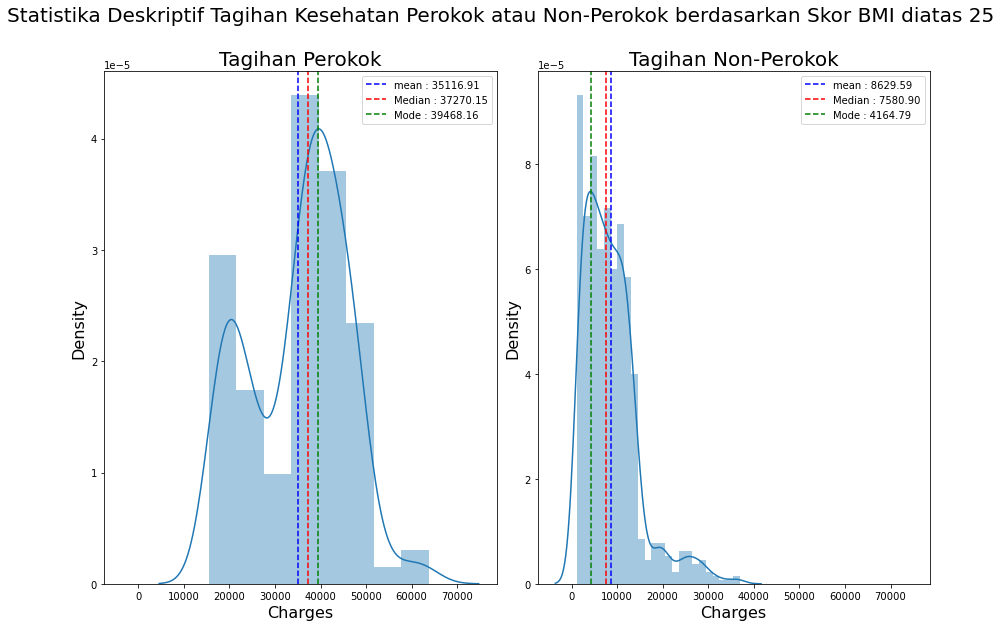

Rata-rata tagihan dari pengguna perokok dengan BMI diatas 25 adalah : 35116.91
Rata-rata tagihan dari pengguna non-perokok dengan BMI diatas 25 adalah : 8629.59


In [14]:
#Prepare Data tagihan kesehatan perokok dan non perokok dengan bmi lebih dari 25
tagihan_perokok_diatas25 = data_asuransi[(data_asuransi["bmi"] > 25) & (data_asuransi["smoker"]=="yes")]["charges"]
tagihan_nonperokok_diatas25 = data_asuransi[(data_asuransi["bmi"] > 25) & (data_asuransi["smoker"]=="no")]["charges"]

#Melakukan Visualisasi data dengan menggunakan displot dan kalkulasi central tendency
fig, ax = plt.subplots(1,2,figsize=(12,8), constrained_layout=True, sharex=True)

p = sns.distplot(tagihan_perokok_diatas25, ax=ax[0], kde=True)
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)

ax[0].set_title("Tagihan Perokok", fontsize=20)
ax[0].axvline(x=tagihan_perokok_diatas25.mean(), color="b", linestyle="--", label=f"mean : {tagihan_perokok_diatas25.mean():.2f}")
ax[0].axvline(np.median(tagihan_perokok_diatas25), color="r", linestyle="--", label=f"Median : {tagihan_perokok_diatas25.median():.2f}")
ax[0].axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.2f}")
ax[0].set_xlabel("Charges", fontsize=16)
ax[0].set_ylabel("Density", fontsize=16)
ax[0].legend()


q = sns.distplot(tagihan_nonperokok_diatas25, ax=ax[1], kde=True)
foo3,foo4 = q.get_lines()[0].get_data()
idx = np.argmax(foo4)

ax[1].set_title("Tagihan Non-Perokok", fontsize=20)
ax[1].axvline(x=tagihan_nonperokok_diatas25.mean(), color="b", linestyle="--", label=f"mean : {tagihan_nonperokok_diatas25.mean():.2f}")
ax[1].axvline(np.median(tagihan_nonperokok_diatas25), color="r", linestyle="--", label=f"Median : {tagihan_nonperokok_diatas25.median():.2f}")
ax[1].axvline(foo3[idx], color="g", linestyle="--", label = f"Mode : {foo3[idx]:.2f}")
ax[1].set_xlabel("Charges", fontsize=16)
ax[1].set_ylabel("Density", fontsize=16)
ax[1].legend()

plt.suptitle('Statistika Deskriptif Tagihan Kesehatan Perokok atau Non-Perokok berdasarkan Skor BMI diatas 25', fontsize=20, y=1.07)
plt.savefig('1_Rata_rata_tagihan_perokok_bmi25.jpg', dpi=300, quality=80, optimize=True, progressive=True)
#Show Visualisasi
plt.show()

print(f"Rata-rata tagihan dari pengguna perokok dengan BMI diatas 25 adalah : {tagihan_perokok_diatas25.mean():.2f}")
print(f"Rata-rata tagihan dari pengguna non-perokok dengan BMI diatas 25 adalah : {tagihan_nonperokok_diatas25.mean():.2f}")

## F. Apakah variansi dari data charges perokok dan non perokok sama?

In [15]:
# Melakukan perhitungan 
tagihan_perokok_variance = data_asuransi[data_asuransi["smoker"] == "yes"]['charges'].var()
tagihan_non_perokok_variance = data_asuransi[data_asuransi["smoker"] == "no"]['charges'].var()

print(f"Varians dari Tagihan perokok adalah : {tagihan_perokok_variance}")
print(f"Varians dari Tagihan non-perokok adalah : {tagihan_non_perokok_variance}")

if tagihan_perokok_variance > tagihan_non_perokok_variance :
    print("Varians dari Tagihan perokok lebih besar dari tagihan non perokok")
elif tagihan_perokok_variance == tagihan_non_perokok_variance :
    print("Varians dari Tagihan perokok sama besarnya dengan tagihan non perokok")
else :
    print("Varians dari Tagihan non-perokok lebih besar dari tagihan perokok")

Varians dari Tagihan perokok adalah : 133207311.20634921
Varians dari Tagihan non-perokok adalah : 35925420.49611172
Varians dari Tagihan perokok lebih besar dari tagihan non perokok


## Kesimpulan Langkah Analisa 1 : Analisa Descriptive Statistic

- Rata-rata umur pengguna asuransi ialah **39 tahun**
- Rata-rata skor BMI dari pengguna yang merokok ialah sebesar **30.71**
- Rata-rata umur pengguna yang memiliki gender perempuan dan laki-laki yang merokok adalah **sama** yakni **38 Tahun**
- Rata-rata Tagihan tertinggi diantara pengguna yang merokok dan non-perokok diraih oleh **pengguna yang merokok** yakni sebesar **32050.23** dibandingkan dengan pengguna yang tidak merokok sebesar **8434.27**
- Rata-rata tagihan tertinggi diantara pengguna dengan nilai BMI diatas 25 dan perokok dan perngguna dengan nilai BMI diatas 25 dan non-perokok ialah **pengguna dengan BMI diatas 25 dan perokok** yakni sebesar **35116.91** dibanding dengan nilai BMI diatas 25 dan non-perokok sebesar **8629.59**
- Varians **Tagihan perokok lebih besar** dibandingkan dengan tagihan non-perokok

# Langkah Analisa : #2  Analisa Variabel Kategorik (PMF)

## A. Proporsi User Per Regional

C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\979195013.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2_proporsi_user_regional.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\979195013.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2_proporsi_user_regional.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\979195013.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "progressive" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2_proporsi_user_regional.jpg', dpi=300, quality=80, optimize=True, progressive=True)


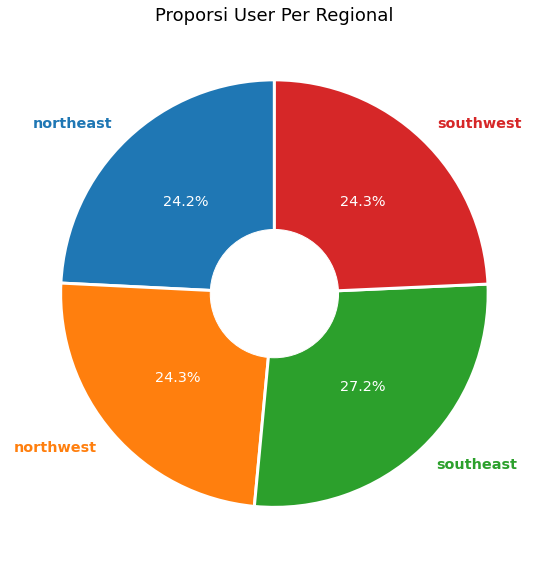

In [16]:
#Mempersiapkan data region dan count user
proporsi_user_region = data_asuransi.groupby("region")['age'].count().reset_index()
proporsi_user_region.rename(columns={'age':'count'}, inplace=True)

region_user = proporsi_user_region["region"]
count_user_region = proporsi_user_region["count"]

#Melakukan visualisasi data dengan menggunakan doughnut chart
fig, ax = plt.subplots(figsize=(10, 8))

patches, texts, pcts = ax.pie(
    count_user_region, labels=region_user, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
    
central_circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('Proporsi User Per Regional', fontsize=18)
plt.savefig('2_proporsi_user_regional.jpg', dpi=300, quality=80, optimize=True, progressive=True)
plt.tight_layout()

Proporsi user pada data asuransi per region adalah :

- northeast memiliki proporsi 24.2%
- southwest memiliki proporsi 24.3%
- northwest memiliki proporsi 24.3%
- southeast memiliki proporsi 27.2%

Dengan demikian Proporsi user tertinggi berada pada region southeast yakni sebesar 27.2% dan terendah pada region northeast yakni sebesar 24.2%

## B.Proporsi Perokok dan Non Perokok User Asuransi 

C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\2625765536.py:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2_proporsi_perokok_nonperokok.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\2625765536.py:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2_proporsi_perokok_nonperokok.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\2625765536.py:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "progressive" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('2_proporsi_perokok_nonperokok.jpg', dpi=300, quality=80, optimize=True, progressive=True)


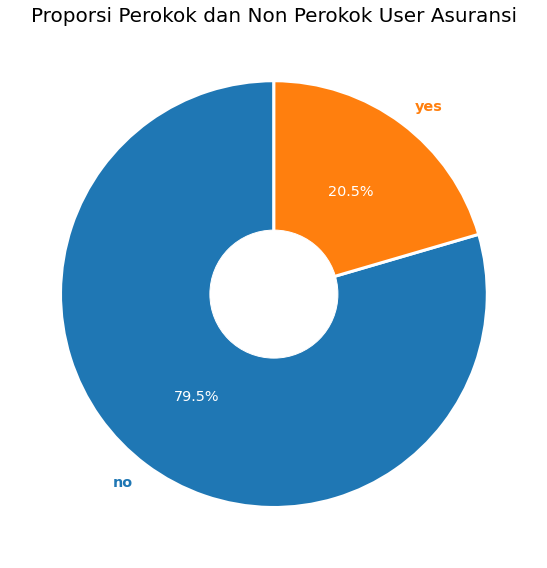

In [17]:
#Mempersiapkan data perokok dan count user perokok
proporsi_perokok_nonperokok = data_asuransi.groupby("smoker")["age"].count().reset_index()
proporsi_perokok_nonperokok.rename(columns = {"age":"count"}, inplace=True)
user_perokok = proporsi_perokok_nonperokok["smoker"]
count_perokok = proporsi_perokok_nonperokok["count"]

#Melakukan visualisasi data dengan menggunakan doughnut chart
fig, ax = plt.subplots(figsize=(10, 8))

patches, texts, pcts = ax.pie(
    count_perokok, labels=user_perokok, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
    
central_circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)

plt.setp(pcts, color='white')
plt.setp(texts, fontweight=800)
ax.set_title('Proporsi Perokok dan Non Perokok User Asuransi', fontsize=20)
plt.savefig('2_proporsi_perokok_nonperokok.jpg', dpi=300, quality=80, optimize=True, progressive=True)
plt.tight_layout()

Proporsi data perokok dan non perokok adalah :

- perokok sebesar 20.5%
- non-perokok sebesar 79.5%

Dengan demikian proporsi non perokok lebih tinggi dibanding proporsi non-perokok

## C. Peluang User Perempuan diketahui Perokok

In [22]:
#Mempersiapkan data
groupby_smoker = data_asuransi.groupby(["smoker","sex"])["age"].count().reset_index()

#Kalkulasi probabilitas
probabilitas_perempuan_perokok = groupby_smoker[(groupby_smoker["sex"]=="female") &
                                                (groupby_smoker["smoker"]=="yes")]["age"]/groupby_smoker["age"].sum()

print("Probabilitas Perempuan perokok adalah :" ,np.around(probabilitas_perempuan_perokok.values, decimals=2))

Probabilitas Perempuan perokok adalah : [0.09]


## D. Peluang User Laki-laki diketahui Perokok

In [23]:
#Mempersiapkan data
groupby_smoker = data_asuransi.groupby(["smoker","sex"])["age"].count().reset_index()

#Kalkulasi probabilitas
probabilitas_laki_perokok = groupby_smoker[(groupby_smoker["sex"]=="male") &
                                           (groupby_smoker["smoker"]=="yes")]["age"]/groupby_smoker["age"].sum()
print("Probabilitas laki perokok adalah :",  np.around(probabilitas_laki_perokok.values, decimals=2))

Probabilitas laki perokok adalah : [0.12]


## E. Distribusi peluang tagihan di tiap-tiap region

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

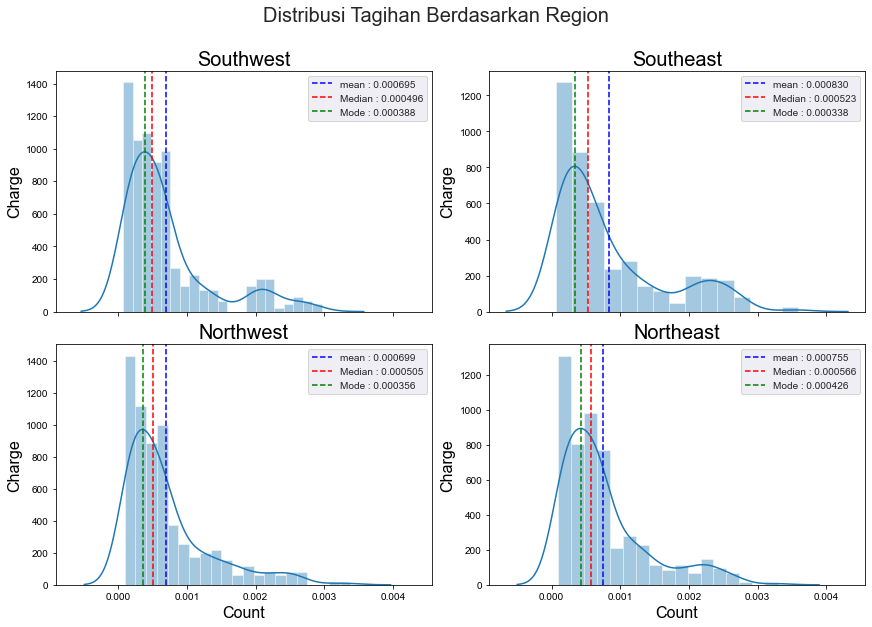

In [18]:
#Mempersiapkan data
southwest_data = data_asuransi[data_asuransi["region"]=="southwest"]['charges']/data_asuransi["charges"].sum()
southeast_data = data_asuransi[data_asuransi["region"]=="southeast"]['charges']/data_asuransi["charges"].sum()
northwest_data = data_asuransi[data_asuransi["region"]=="northwest"]['charges']/data_asuransi["charges"].sum()
northeast_data = data_asuransi[data_asuransi["region"]=="northeast"]['charges']/data_asuransi["charges"].sum()

#Melakukan visualisasi Data Distribusi
fig, ax = plt.subplots(2,2,figsize=(12,8), constrained_layout=True, sharex=True)

sns.set_style('darkgrid')
p = sns.distplot(southwest_data, ax=ax[0,0], kde=True)
foo1,foo2 = p.get_lines()[0].get_data()
idx = np.argmax(foo2)

ax[0,0].set_title("Southwest", fontsize=20)
ax[0,0].axvline(x=southwest_data.mean(), color="b", linestyle="--", label=f"mean : {southwest_data.mean():.6f}")
ax[0,0].axvline(np.median(southwest_data), color="r", linestyle="--", label=f"Median : {southwest_data.median():.6f}")
ax[0,0].axvline(foo1[idx], color="g", linestyle="--", label = f"Mode : {foo1[idx]:.6f}")
ax[0,0].set_xlabel("Count", fontsize=16)
ax[0,0].set_ylabel("Charge", fontsize=16)
ax[0,0].legend()

q = sns.distplot(southeast_data, ax=ax[0,1], kde=True)
foo3,foo4 = q.get_lines()[0].get_data()
idx = np.argmax(foo4)

ax[0,1].set_title("Southeast", fontsize=20)
ax[0,1].axvline(x=southeast_data.mean(), color="b", linestyle="--", label=f"mean : {southeast_data.mean():.6f}")
ax[0,1].axvline(np.median(southeast_data), color="r", linestyle="--", label=f"Median : {southeast_data.median():.6f}")
ax[0,1].axvline(foo3[idx], color="g", linestyle="--", label = f"Mode : {foo3[idx]:.6f}")
ax[0,1].set_xlabel("Count", fontsize=16)
ax[0,1].set_ylabel("Charge", fontsize=16)
ax[0,1].legend()

r = sns.distplot(northwest_data, ax=ax[1,0], kde=True)
foo5,foo6 = r.get_lines()[0].get_data()
idx = np.argmax(foo6)

ax[1,0].set_title("Northwest", fontsize=20)
ax[1,0].axvline(x=northwest_data.mean(), color="b", linestyle="--", label=f"mean : {northwest_data.mean():.6f}")
ax[1,0].axvline(np.median(northwest_data), color="r", linestyle="--", label=f"Median : {northwest_data.median():.6f}")
ax[1,0].axvline(foo5[idx], color="g", linestyle="--", label = f"Mode : {foo5[idx]:.6f}")
ax[1,0].set_xlabel("Count", fontsize=16)
ax[1,0].set_ylabel("Charge", fontsize=16)
ax[1,0].legend()

s = sns.distplot(northeast_data, ax=ax[1,1], kde=True)
foo7,foo8 = s.get_lines()[0].get_data()
idx = np.argmax(foo8)

ax[1,1].set_title("Northeast", fontsize=20)
ax[1,1].axvline(x=northeast_data.mean(), color="b", linestyle="--", label=f"mean : {northeast_data.mean():.6f}")
ax[1,1].axvline(np.median(northeast_data), color="r", linestyle="--", label=f"Median : {northeast_data.median():.6f}")
ax[1,1].axvline(foo7[idx], color="g", linestyle="--", label = f"Mode : {foo7[idx]:.6f}")
ax[1,1].set_xlabel("Count", fontsize=16)
ax[1,1].set_ylabel("Charge", fontsize=16)
ax[1,1].legend()

plt.savefig('2_Distribusi_Tagihan_Berdasarkan_Region.jpg', dpi=300, quality=80, optimize=True, progressive=True)
plt.suptitle('Distribusi Tagihan Berdasarkan Region', fontsize=20, y=1.07)
plt.show()


## F. Gender dengan Tagihan Tertinggi

In [19]:
#Mempersiapkan Data
tagihan_laki = data_asuransi[data_asuransi["sex"] == "male"]['charges'].sum()
tagihan_perempuan = data_asuransi[data_asuransi["sex"] == "female"]['charges'].sum()

#Print nilai tagihan laki-laki dan perempuan
print("Tagihan tertinggi laki-laki adalah", tagihan_laki)
print("Tagihan tertinggi Perempuan adalah", tagihan_perempuan)

#Conditional
if tagihan_laki > tagihan_perempuan :
    print("Maka, Tagihan laki-laki lebih besar dibanding tagihan perempuan")
elif tagihan_laki == tagihan_perempuan :
    print("Maka, Tagihan laki-laki sama besarnya dengan tagihan perempuan")
else :
    print("Maka, Tagihan Perempuan lebih besar dibanding tagihan laki-laki")

Tagihan tertinggi laki-laki adalah 9434763.79614
Tagihan tertinggi Perempuan adalah 8321061.194619
Maka, Tagihan laki-laki lebih besar dibanding tagihan perempuan


## Kesimpulan Langkah Analisa 2 : #2 Analisa Variabel Kategorik (PMF)

- Secara umum, region tidak memiliki proporsi data yang sama, namun pada southwest dan northwest saja yang memiliki proporsi serupa yakni **24.3%**
- Proporsi non perokok mendominasi proporsi pengguna asuransi yakni sebesar **79.5%** dibandingkan dengan non-perokok sebesar **20.5%**
- Probabilitas peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok adalah **0.09 atau 9%**
- Probabilitas peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok adalah **0.12 atau 12%**
- Pada Distribusi peluang tagihan, plot distribusi membentuk right skewed yang berarti central tendency baiknya diletakkan pada nilai median
- **Tagihan Laki-laki** lebih besar dibanding **Perempuan**, yakni 9434763 dibandingkan dengan Perempuan sebesar 8321061

# Langkah Analisa : #3   Analisa Variabel Kontinu (CDF)

## A. Kemungkinan Perokok dan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k dan dibawah 16.7k

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\1648817737.py:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('3_CDF_BMI_25_Perokok.jpg', dpi=300, quality=80, optimize

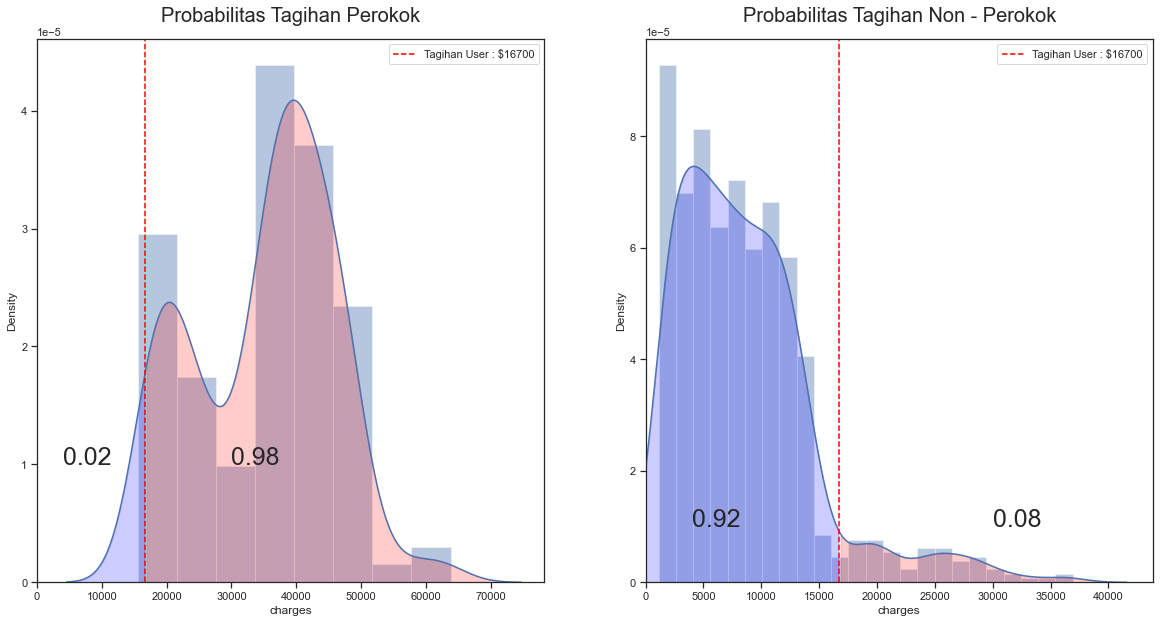

In [21]:
#Mempersiapkan Data
data_perokok = data_asuransi[(data_asuransi["smoker"] == "yes") & (data_asuransi['bmi'] >= 25)]["charges"]
data_non_perokok = data_asuransi[(data_asuransi["smoker"] == "no") & (data_asuransi['bmi'] >= 25)]["charges"]

tagihanperokok_diatas_16700 = data_asuransi[((data_asuransi["smoker"] == "yes") & \
                                             (data_asuransi['bmi'] >= 25) & \
                                             (data_asuransi['charges'] > 16700))]['charges']
                                             
tagihanperokok_dibawah_16700 = data_asuransi[((data_asuransi["smoker"] == "yes") & \
                                             (data_asuransi['bmi'] >= 25) & \
                                             (data_asuransi['charges'] <= 16700))]['charges']
 
tagihannonperokok_diatas_16700 = data_asuransi[((data_asuransi["smoker"] == "no") & \
                                             (data_asuransi['bmi'] >= 25) & \
                                             (data_asuransi['charges'] > 16700))]['charges']

tagihannonperokok_dibawah_16700  = data_asuransi[((data_asuransi["smoker"] == "no") & \
                                                 (data_asuransi['bmi'] >= 25) & \
                                                 (data_asuransi['charges'] <= 16700))]['charges']

#Membentuk Visualisasi data distribusi
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
sns.set(style="ticks")
t = sns.distplot(data_perokok, ax=ax[0])
foo7,foo8 = t.get_lines()[0].get_data()

ax[0].axvline(x=16700, color="red", linestyle="--", label="Tagihan User : $16700")
ax[0].fill_between(foo7, foo8, where=(foo7 > 16700), color='red', alpha=0.2)
ax[0].fill_between(foo7, foo8, where=(foo7 < 16700), color='blue', alpha=0.2)
ax[0].text(x=30000, y=1e-5, s=f"{len(tagihanperokok_diatas_16700)/len(data_perokok):.2f}", fontsize=25)
ax[0].text(x=4000, y=1e-5, s=f"{len(tagihanperokok_dibawah_16700)/len(data_perokok):.2f}", fontsize=25)
ax[0].set_title("Probabilitas Tagihan Perokok", fontsize=20, y=1.02)
ax[0].legend()
ax[0].set_xlim(left=0)

t = sns.distplot(data_non_perokok, ax=ax[1])
foo9,foo10 = t.get_lines()[0].get_data()
ax[1].axvline(x=16700, color="red", linestyle="--", label="Tagihan User : $16700")
ax[1].fill_between(foo9, foo10, where=(foo9 > 16700), color='red', alpha=0.2)
ax[1].fill_between(foo9, foo10, where=(foo9 < 16700), color='blue', alpha=0.2)
ax[1].text(x=30000, y=1e-5, s=f"{len(tagihannonperokok_diatas_16700)/len(data_non_perokok):.2f}", fontsize=25)
ax[1].text(x=4000, y=1e-5, s=f"{len(tagihannonperokok_dibawah_16700)/len(data_non_perokok):.2f}", fontsize=25)
ax[1].set_title("Probabilitas Tagihan Non - Perokok", fontsize=20, y=1.02)
ax[1].legend()
ax[1].set_xlim(left=0)

plt.savefig('3_CDF_BMI_25_Perokok.jpg', dpi=300, quality=80, optimize=True, progressive=True)
plt.show()

Berikut Analisa untuk Kemungkinan Perokok dan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k :

- Pada plot diatas didapatkan kemungkinan bahwa pengguna yang merokok dan memiliki bmi >= 25 untuk mendapatkan tagihan lebih dari **\\$16700** adalah **0.98** dan probabilitas pengguna yang merokok dan memiliki bmi >= 25 untuk mendapatkan tagihan kurang dari **\\$16700** adalah 0.2. Dengan demikian, dapat disimpulkan bahwa pengguna lebih mungkin mendapatkan tagihan asuransi lebih dari  **\\$16700** ketika pengguna merokok dan memiliki bmi >= 25.

- Pada plot selanjutnya, menunjukkan informasi bahwa probabilitas pengguna yang tidak merokok dan memiliki bmi >= 25 untuk mendapatkan tagihan lebih dari **\\$16700** adalah **0.08** dan probabilitas pengguna yang tidak merokok dan memiliki bmi >= 25 untuk mendapatkan tagihan kurang dari **\\$16700** adalah 0.92. Dengan demikian, dapat disimpulkan bahwa pengguna lebih mungkin mendapatkan tagihan asuransi kurang dari  **\\$16700** ketika pengguna tidak merokok dan memiliki bmi >= 25.

Sejauh ini, dapat disimpulkan kembali bahwa pengguna mendapatkan kemungkinan membayar tagihan sebesar lebih dari **\\$16700** lebih tinggi ketika pengguna mendapati dirinya memiliki skor bmi >= 25 dan perokok


## B. BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k dan dibawah 16.7k

C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\2286331274.py:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('3_CDF_BMI_25.jpg', dpi=300, quality=80, optimize=True, p

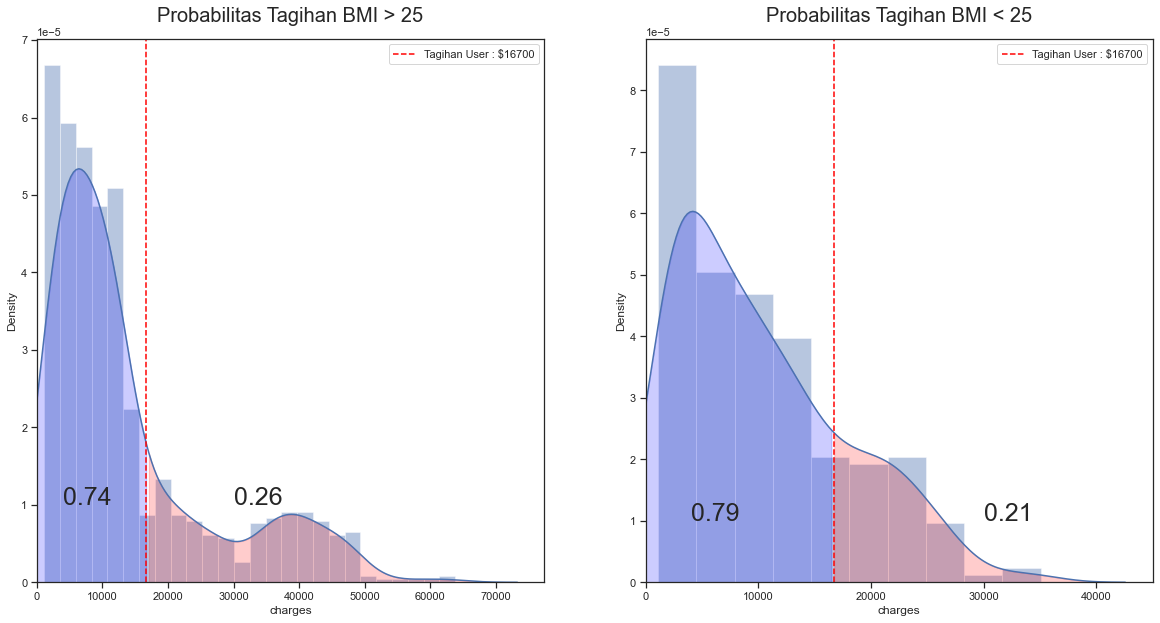

In [22]:
#Mempersiapkan Data
bmi_diatas25 = data_asuransi[data_asuransi["bmi"] >= 25]["charges"]
bmi_dibawah25 = data_asuransi[data_asuransi["bmi"] < 25]["charges"]

tagihanatas_bmiatas = data_asuransi[(data_asuransi["bmi"] >= 25) & (data_asuransi['charges'] > 16700)]['charges']
tagihanbawah_bmiatas = data_asuransi[(data_asuransi["bmi"] >= 25) & (data_asuransi['charges'] <= 16700)]['charges']

tagihanatas_bmibawah = data_asuransi[(data_asuransi["bmi"] < 25) & (data_asuransi['charges'] > 16700)]['charges']
tagihanbawah_bmibawah  = data_asuransi[(data_asuransi["bmi"] < 25) & (data_asuransi['charges'] <= 16700)]['charges']

#Melakukan Visualisasi Data
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
sns.set(style="ticks")
t = sns.distplot(bmi_diatas25, ax=ax[0])
foo7,foo8 = t.get_lines()[0].get_data()

ax[0].axvline(x=16700, color="red", linestyle="--", label="Tagihan User : $16700")
ax[0].fill_between(foo7, foo8, where=(foo7 > 16700), color='red', alpha=0.2)
ax[0].fill_between(foo7, foo8, where=(foo7 < 16700), color='blue', alpha=0.2)
ax[0].text(x=30000, y=1e-5, s=f"{len(tagihanatas_bmiatas)/len(bmi_diatas25):.2f}", fontsize=25)
ax[0].text(x=4000, y=1e-5, s=f"{len(tagihanbawah_bmiatas)/len(bmi_diatas25):.2f}", fontsize=25)
ax[0].set_title("Probabilitas Tagihan BMI > 25", fontsize=20, y=1.02)
ax[0].legend()
ax[0].set_xlim(left=0)

t = sns.distplot(bmi_dibawah25, ax=ax[1])
foo9,foo10 = t.get_lines()[0].get_data()
ax[1].axvline(x=16700, color="red", linestyle="--", label="Tagihan User : $16700")
ax[1].fill_between(foo9, foo10, where=(foo9 > 16700), color='red', alpha=0.2)
ax[1].fill_between(foo9, foo10, where=(foo9 < 16700), color='blue', alpha=0.2)
ax[1].text(x=30000, y=1e-5, s=f"{len(tagihanatas_bmibawah)/len(bmi_dibawah25):.2f}", fontsize=25)
ax[1].text(x=4000, y=1e-5, s=f"{len(tagihanbawah_bmibawah)/len(bmi_dibawah25):.2f}", fontsize=25)
ax[1].set_title("Probabilitas Tagihan BMI < 25", fontsize=20, y=1.02)
ax[1].legend()
ax[1].set_xlim(left=0)

plt.savefig('3_CDF_BMI_25.jpg', dpi=300, quality=80, optimize=True, progressive=True)
plt.show()

Berikut Analisa untuk Kemungkinan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k :

- Pada plot diatas menunjukkan informasi bahwa probabilitas pengguna yang memiliki bmi >= 25 untuk mendapatkan tagihan lebih dari **\\$16700** adalah 0.26 dan probabilitas pengguna yang memiliki bmi >= 25 untuk mendapatkan tagihan kurang dari **\\$16700** adalah 0.74. Dengan demikian dapat disimpulkan bahwa pengguna lebih mungkin mendapatkan tagihan asuransi kurang dari **\\$16700**.

- dan pada plot selanjutnya menunjukkan informasi bahwa bahwa probabilitas pengguna yang memiliki bmi < 25 untuk mendapatkan tagihan lebih dari $16700 adalah 0.21 dan probabilitas pengguna yang memiliki bmi < 25 untuk mendapatkan tagihan kurang dari **\\$16700** adalah 0.79. Dengan demikian dapat disimpulkan bahwa pengguna lebih mungkin mendapatkan tagihan asuransi kurang dari **\\$16700**.

-Sejauh ini, dapat kembali kita simpulkan bahwa pengguna mendapatkan kemungkinan mendapatkan tagihan sebesar lebih dari **\\$16700** lebih tinggi ketika pengguna mendapati dirinya memiliki skor bmi >= 25

## Kesimpulan Langkah Analisa 3 : #3 Analisa Variabel Kontinu (CDF)

- Pengguna mendapatkan kemungkinan membayar tagihan sebesar lebih dari **\\$16700** lebih tinggi ketika pengguna mendapati dirinya memiliki skor bmi >= 25 dan perokok
- Pengguna mendapatkan kemungkinan mendapatkan tagihan sebesar lebih dari **\\$16700** lebih tinggi ketika pengguna mendapati dirinya memiliki skor bmi >= 25
- Dari kedua analisa diatas, pengguna dengan probabilitas membayar tagihan sebesar lebih dari **\\$16700** lebih tinggi ketika pengguna mendapati dirinya memiliki skor bmi >= 25 dan perokok

# Langkah Analisa : #4 Analisa Korelasi Variabel

## A. Melakukan Analisa Korelasi antar Keseluruhan Data

C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\3380429422.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('4_All_korelasi.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\3380429422.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('4_All_korelasi.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\3380429422.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "progressive" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('4_All_korelasi.jpg', dpi=300, quality=80, optimize=True, progressive=True)


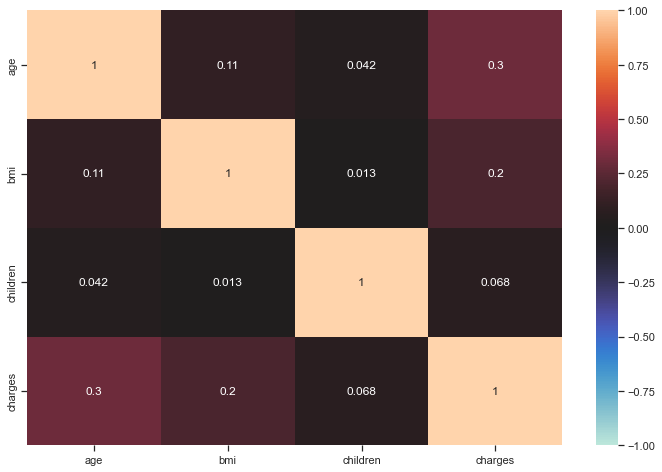

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(data_asuransi.corr(), annot=True, vmax=1, vmin=-1, center=0)
plt.savefig('4_All_korelasi.jpg', dpi=300, quality=80, optimize=True, progressive=True)
plt.show()

Kesimpulan Analisa Korelasi antar Keseluruhan Data:

 - Jika melihat heatmap diatas menunjukkan informasi bahwa korelasi tertinggi terdapat pada variabel umur dan charge dengan nilai korelasi sebesar 0.3
 - dan korelasi terendah terdapat pada bmi dan children sebesar 0.013

## B. Analisa Data Korelasi Data Perokok dan Data Non-Perokok antar keseluruhan variabel

C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\1192408174.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('4_korelasi_smoker.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\1192408174.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('4_korelasi_smoker.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\1192408174.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "progressive" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('4_korelasi_smoker.jpg', dpi=300, quality=80, optimize=True, progressive=True)


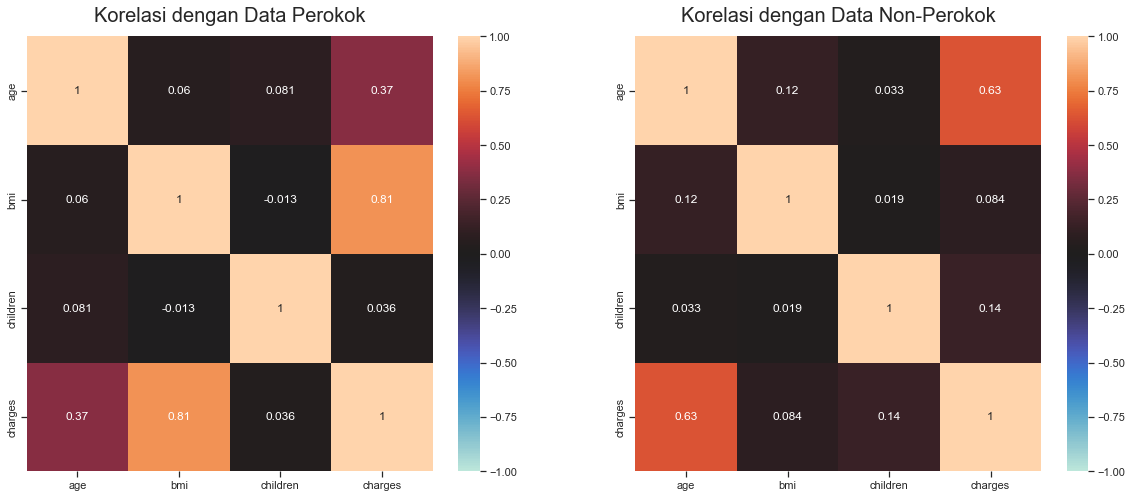

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

data_perokok = data_asuransi[data_asuransi["smoker"]=="yes"].corr()
data_non_perokok = data_asuransi[data_asuransi["smoker"]=="no"].corr()

sns.heatmap(data_perokok, annot=True, vmax=1, vmin=-1, center=0, ax=ax[0])
sns.heatmap(data_non_perokok, annot=True, vmax=1, vmin=-1, center=0, ax=ax[1])

ax[0].set_title("Korelasi dengan Data Perokok", fontsize=20, y=1.02)
ax[1].set_title("Korelasi dengan Data Non-Perokok", fontsize=20, y=1.02)
plt.savefig('4_korelasi_smoker.jpg', dpi=300, quality=80, optimize=True, progressive=True)
plt.show()

Kesimpulan Analisa Korelasi Data Perokok dan Non-Perokok:
    
Perokok 
 - Jika melihat heatmap diatas menunjukkan informasi bahwa korelasi tertinggi terdapat pada variabel bmi dan charge dengan nilai korelasi sebesar 0.81
 - dan korelasi terendah terdapat pada bmi dan children sebesar 0.013
 
Non-Perokok
- Jika melihat heatmap diatas menunjukkan informasi bahwa korelasi tertinggi terdapat pada variabel age dan charge dengan nilai korelasi sebesar 0.61
- dan korelasi terendah terdapat pada bmi dan children sebesar 0.019

## C. Analisa Data Korelasi BMI > = 25 dan BMI < 25 antar keseluruhan variabel

C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\997678313.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('4_korelasi_bmi.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\997678313.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('4_korelasi_bmi.jpg', dpi=300, quality=80, optimize=True, progressive=True)
C:\Users\HALAL\AppData\Local\Temp\ipykernel_840\997678313.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "progressive" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('4_korelasi_bmi.jpg', dpi=300, quality=80, optimize=True, progressive=True)


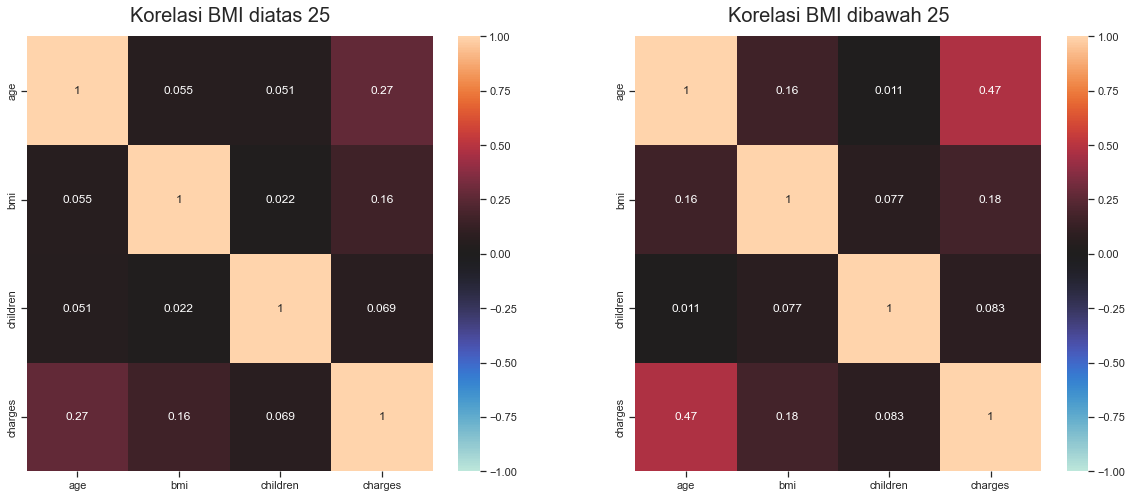

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

bmi_diatas_25 = data_asuransi[data_asuransi["bmi"] >= 25].corr()
bmi_dibawah_25 = data_asuransi[data_asuransi["bmi"] < 25].corr()

sns.heatmap(bmi_diatas_25, annot=True, vmax=1, vmin=-1, center=0, ax=ax[0])
sns.heatmap(bmi_dibawah_25, annot=True, vmax=1, vmin=-1, center=0, ax=ax[1])

ax[0].set_title("Korelasi BMI diatas 25", fontsize=20, y=1.02)
ax[1].set_title("Korelasi BMI dibawah 25", fontsize=20, y=1.02)
plt.savefig('4_korelasi_bmi.jpg', dpi=300, quality=80, optimize=True, progressive=True)
plt.show()

Kesimpulan Analisa Korelasi Data BMI > 25 dan Data BMI <= 25:
    
Korelasi Data BMI > 25
 - Jika melihat heatmap diatas menunjukkan informasi bahwa korelasi tertinggi terdapat pada variabel age dan charge dengan nilai korelasi sebesar 0.27
 - dan korelasi terendah terdapat pada bmi dan children sebesar 0.022
 
Korelasi Data BMI <= 25
- Jika melihat heatmap diatas menunjukkan informasi bahwa korelasi tertinggi terdapat pada variabel age dan charge dengan nilai korelasi sebesar 0.47
- dan korelasi terendah terdapat pada age dan children sebesar 0.011

## Kesimpulan Langkah Analisa 4 : #4 Analisa Korelasi Variabel

Secara umum, berikut variabel tertinggi tingkat korelasinya berdasarkan hasil analisa heatmap diatas ialah :

- age dan charge
- bmi dan charge

# Langkah Analisa : #5 - Pengujian Hipotesis

## A. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

In [42]:
smoker = data_asuransi[data_asuransi['smoker']=='yes']["charges"]
non_smoker = data_asuransi[data_asuransi['smoker']=='no']["charges"]

nilai_alpha=0.05

stat, p_value = ttest_ind(a = smoker, b = non_smoker, equal_var=False, alternative='greater')

print('Statistics = %.4f, p-value = %.4f' % (stat, p_value))

if p_value < nilai_alpha:
    print('Maka dapat disimpulkan bahwa, Tolak Ho Tagihan perokok lebih besar daripada Tagihan non-perokok ') 
else:
    print('Maka dapat disimpulkan bahwa, Gagal tolak Ho, tidak cukup bukti bahwa Tagihan perokok lebih besar daripada Tagihan non-perokok')

Statistics = 32.7519, p-value = 0.0000
Maka dapat disimpulkan bahwa, Tolak Ho Tagihan perokok lebih besar daripada Tagihan non-perokok 


## B. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

In [47]:
bmi_dibawah25 = data_asuransi[data_asuransi['bmi']<=25]["charges"]
bmi_diatas25 = data_asuransi[data_asuransi['bmi']>25]["charges"]

alpha=0.05

stat, p_value = ttest_ind(a = bmi_diatas25, b = bmi_dibawah25, equal_var=False, alternative='greater')

print('Statistics = %.4f, p-value = %.4f' % (stat, p_value))

if p_value < alpha:
    print('Tolak Ho, Maka Tagihan Asuransi dengan BMI > 25 lebih tinggi daripada tagihan asuransi dengn BMI <= 25') 
else:
    print('Gagal tolak Ho, tidak cukup bukti Tagihan Asuransi dengan BMI > 25 lebih tinggi dari tagihan asuransi dengan BMI <= 25')

Statistics = 5.9535, p-value = 0.0000
Tolak Ho, Maka Tagihan Asuransi dengan BMI > 25 lebih tinggi daripada tagihan asuransi dengn BMI <= 25


## C. Tagihan kesehatan laki-laki lebih besar dari perempuan?

In [54]:
tagihan_laki = data_asuransi[data_asuransi['sex']=='male']["charges"]
tagihan_perempuan = data_asuransi[data_asuransi['sex']=='female']["charges"]

alpha=0.05

stat, p_value = ttest_ind(a = tagihan_laki, b = tagihan_perempuan, equal_var=False, alternative='greater')

print('Statistics = %.4f, p-value = %.4f' % (stat, p_value))

if p < alpha:
    print('Tolak Ho, Maka tagihan asuransi laki-laki lebih tinggi daripada tagihan asuransi Perempuan') 
else:
    print('Gagal tolak Ho, tidak cukup bukti bahwa tagihan asuransi laki-laki lebih tinggi daripada tagihan asuransi Perempuan')

Statistics = 2.1009, p-value = 0.0179
Tolak Ho, Maka tagihan asuransi laki-laki lebih tinggi daripada tagihan asuransi Perempuan


## Kesimpulan Langkah Analisa 5 : #5 Pengujian Hipotesis

- Tagihan perokok lebih besar daripada Tagihan non-perokok
- Tagihan Asuransi dengan BMI > 25 lebih tinggi daripada tagihan asuransi dengn BMI <= 25
- Tagihan asuransi laki-laki lebih tinggi daripada tagihan asuransi Perempuan.

# Conclusion
Secara umum, Asuransi mesti memperkecil probabilitas dalam resiko bisnis dengan melakukan optimalisasi kinerja perusahaan, salah satu hal yang mesti diperhatikan ialah penggunaan data untuk keputusan bisnis.

### Langkah 1 membedah data dengan melakukan deskriptif statistik, yang berisi mengenai

- Rata-rata umur pengguna yakni 39 Tahun
- Rata-rata skor BMI dari pengguna yang merokok ialah sebesar 30.71
- Pengguna yang merokok memiliki Rata-rata Tagihan tertinggi dibanding yang tidak merokok 32050.23 dibandingkan dengan pengguna yang tidak merokok sebesar 8434.27
- Pengguna dengan BMI diatas 25 dan perokok memiliki rata-rata tagihan tertinggi yakni sebesar 35116.91 dibanding dengan nilai BMI diatas 25 dan non-perokok sebesar 8629.59
- Varians Tagihan perokok lebih besar dibandingkan dengan tagihan non-perokok

### Langkah 2 analisa data mengenai variabel kategorik (PMF)

- Secara umum, region tidak memiliki proporsi data yang sama, namun pada southwest dan northwest saja yang memiliki proporsi serupa yakni 24.3%
- Proporsi non perokok mendominasi proporsi pengguna asuransi yakni sebesar 79.5% dibandingkan dengan non-perokok sebesar 20.5%
- Probabilitas peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok adalah 0.09 atau 9%
- Probabilitas peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok adalah 0.12 atau 12%
- Pada Distribusi peluang tagihan, plot distribusi membentuk right skewed yang berarti central tendency baiknya diletakkan pada nilai median
- **Tagihan Laki-laki** lebih besar dibanding **Perempuan**, yakni 9434763 dibandingkan dengan Perempuan sebesar 8321061

### Langkah 3 analisa data mengenai variabel kontinu (CDF)

- Pengguna mendapatkan kemungkinan membayar tagihan sebesar lebih dari **\\$16700** lebih tinggi ketika pengguna mendapati dirinya memiliki skor bmi >= 25 dan perokok
- Pengguna mendapatkan kemungkinan mendapatkan tagihan sebesar lebih dari **\\$16700** lebih tinggi ketika - pengguna mendapati dirinya memiliki skor bmi >= 25
- Dari kedua analisa diatas, pengguna dengan probabilitas membayar tagihan sebesar lebih dari **\\$16700** lebih tinggi ketika pengguna mendapati dirinya memiliki skor bmi >= 25 dan perokok

### Langkah 4 analisa data mengenai Korelasi Variabel
- variabel tertinggi tingkat korelasinya berdasarkan hasil analisa heatmap diatas ialah : age dan charge, bmi dan charge

### Langkah 5 Pengujian Hipotesis

- Tagihan perokok lebih besar daripada Tagihan non-perokok
- Tagihan Asuransi dengan BMI > 25 lebih tinggi daripada tagihan asuransi dengn BMI <= 25
- Tagihan asuransi laki-laki lebih tinggi daripada tagihan asuransi Perempuan.

### Further Research
- Melakukan Analisa Regresi baik itu linear sederhana, berganda maupun Regresi Data Panel untuk melihat pengaruh antar variabel
- Melakukan Analisa Machine Learning untuk mendeteksi pola tagihan dan untuk mendeteksi resiko yang dihadapi

Link Medium
https://medium.com/@prasetyow938/analisa-data-eksploratif-tagihan-asuransi-pengguna-10bab9a5ca1